In [1]:
import numpy as np 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

In [2]:
df = pd.read_csv('menu.csv')
df[0:5]

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,...,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,...,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,...,30,10,4,17,2,21,6,0,25,10


In [3]:
X = df[['Total Fat (% Daily Value)', 'Saturated Fat (% Daily Value)', 'Cholesterol (% Daily Value)', 'Sodium (% Daily Value)', 'Carbohydrates (% Daily Value)', 'Dietary Fiber (% Daily Value)', 'Vitamin A (% Daily Value)', 'Vitamin C (% Daily Value)', 'Calcium (% Daily Value)', 'Iron (% Daily Value)']]
X[0:5]

,Total Fat (% Daily Value),Saturated Fat (% Daily Value),Cholesterol (% Daily Value),Sodium (% Daily Value),Carbohydrates (% Daily Value),Dietary Fiber (% Daily Value),Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,20,25,87,31,10,17,10,0,25,15
1,12,15,8,32,10,17,6,0,25,8
2,35,42,15,33,10,17,8,0,25,10
3,43,52,95,36,10,17,15,0,30,15
4,35,42,16,37,10,17,6,0,25,10


In [4]:
Y = df['Category']
Y[0:5]

0    Breakfast
1    Breakfast
2    Breakfast
3    Breakfast
4    Breakfast
Name: Category, dtype: object

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_trainset, X_testset, Y_trainset, Y_testset = train_test_split(X, Y, test_size=0.3, random_state=3)

In [7]:
mcdTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
mcdTree

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [8]:
mcdTree.fit(X_trainset,Y_trainset)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [9]:
predTree = mcdTree.predict(X_testset)

In [10]:
print (predTree [0:5])
print (Y_testset [0:5])

['Breakfast' 'Breakfast' 'Smoothies & Shakes' 'Breakfast' 'Chicken & Fish']
16              Breakfast
31              Breakfast
243    Smoothies & Shakes
67         Chicken & Fish
61         Chicken & Fish
Name: Category, dtype: object


In [11]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(Y_testset, predTree))

DecisionTrees's Accuracy:  0.6794871794871795


In [12]:
import numpy as np 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from pandas import Series, DataFrame
import pandas as pd
import numpy as np
import os
import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn import tree
import sklearn.metrics
from sklearn import tree
from io import StringIO
from IPython.display import Image
import pydotplus

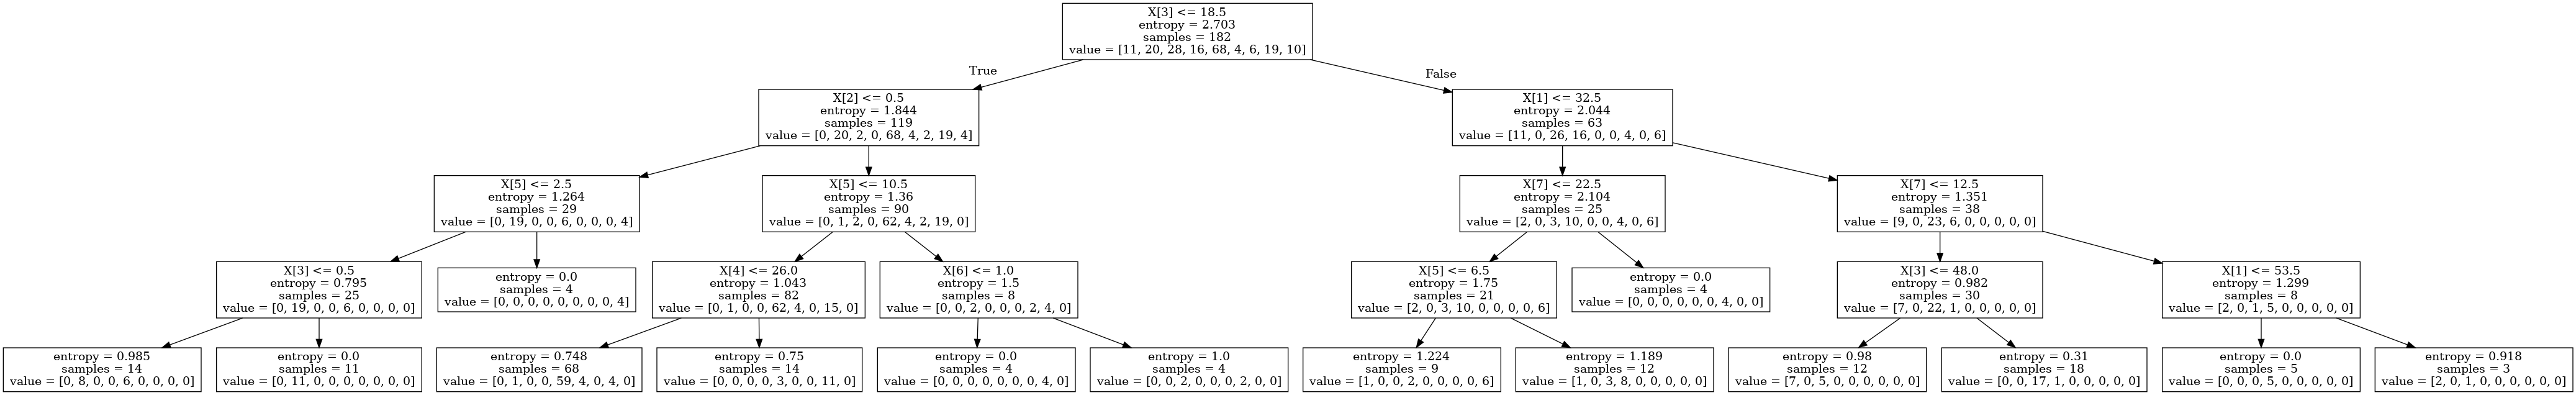

In [18]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

out = StringIO()
tree.export_graphviz(mcdTree, out_file=out)
import pydotplus
graph=pydotplus.graph_from_dot_data(out.getvalue())
Image(graph.create_png())

In [19]:
filename = "mcdtree.png" 
graph.write_png(filename)

True

In [24]:
# your code here
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

[[ 3  0  1  0  0  0  0  0]
 [ 0  6  0  0  1  0  0  0]
 [ 3  0  9  1  0  0  0  1]
 [ 1  0  1  8  1  0  0  0]
 [ 0  5  0  0 20  0  2  0]
 [ 0  0  0  0  2  0  0  1]
 [ 0  0  0  0  3  0  6  0]
 [ 0  1  0  0  1  0  0  1]]
                    precision    recall  f1-score   support

       Beef & Pork       0.43      0.75      0.55         4
         Beverages       0.50      0.86      0.63         7
         Breakfast       0.82      0.64      0.72        14
    Chicken & Fish       0.89      0.73      0.80        11
      Coffee & Tea       0.71      0.74      0.73        27
          Desserts       0.00      0.00      0.00         3
Smoothies & Shakes       0.75      0.67      0.71         9
    Snacks & Sides       0.33      0.33      0.33         3

         micro avg       0.68      0.68      0.68        78
         macro avg       0.55      0.59      0.56        78
      weighted avg       0.69      0.68      0.67        78

Confusion matrix, without normalization
[[ 3  0  1  0  0  0 

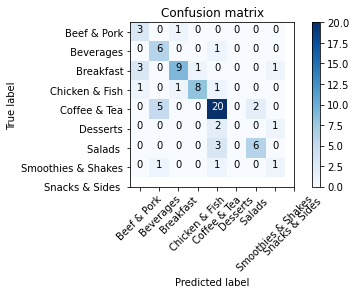

In [25]:
from sklearn.metrics import classification_report,confusion_matrix
cnf_matrix = confusion_matrix(Y_testset, predTree)
print(confusion_matrix(Y_testset,predTree))
print(classification_report(Y_testset,predTree))
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Beef & Pork',' Beverages','Breakfast','Chicken & Fish','Coffee & Tea','Desserts','Salads ','Smoothies & Shakes','Snacks & Sides '],normalize= False,  title='Confusion matrix')